In [15]:
import os
from os import listdir
from os.path import join,isfile
mypath='./datasets/images/'
file_names=[]
for f in listdir(mypath):
    if isfile(join(mypath,f)):
        file_names.append(f)

In [31]:
import shutil
training_images=[]
training_labels=[]
test_images=[]
test_labels=[]
dog_count=0
cat_count=0
train_dog_dir='./datasets/images/catvsdog/train/dogs/'
train_cat_dir='./datasets/images/catvsdog/train/cats/'
test_dog_dir='./datasets/images/catvsdog/test/dogs/'
test_cat_dir='./datasets/images/catvsdog/test/cats/'
def make_dir(directory):
    if os.path.exists(directory):
        shutil.rmtree(directory)
    os.makedirs(directory)
make_dir(train_dog_dir)
make_dir(train_cat_dir)
make_dir(test_dog_dir)
make_dir(test_cat_dir)

In [34]:
import cv2
import numpy as np
def count_zeros(number):
    if(number<10):
        return "00"
    elif (number>=10 and number<100):
        return "0"
    else:
        return ""
for i,file in enumerate(file_names):
    if (file_names[i][0]=='d'):
        dog_count+=1
        image=cv2.imread(mypath+file)
        image=cv2.resize(image,(150,150),interpolation=cv2.INTER_CUBIC)
        zeros=count_zeros(dog_count)
        if(dog_count>1000 and dog_count<=1500):
            test_labels.append(1)
            test_images.append(image)
            cv2.imwrite(test_dog_dir+"dog"+zeros+str(dog_count-1000)+".jpg",image)
        elif dog_count<=1000:
            training_labels.append(1)
            training_images.append(image)
            cv2.imwrite(train_dog_dir+"dog"+zeros+str(dog_count)+".jpg",image)
    elif (file_names[i][0]=='c'):
        cat_count+=1
        image=cv2.imread(mypath+file)
        image=cv2.resize(image,(150,150),interpolation=cv2.INTER_CUBIC)
        zeros=count_zeros(cat_count)
        if(cat_count>1000 and cat_count<=1500):
            test_labels.append(0)
            test_images.append(image)
            cv2.imwrite(test_cat_dir+"cat"+zeros+str(cat_count-1000)+".jpg",image)
        elif cat_count<=1000:
            training_labels.append(0)
            training_images.append(image)
            cv2.imwrite(train_cat_dir+"cat"+zeros+str(cat_count)+".jpg",image)
    if dog_count==1500 and cat_count==1500:
        break

In [39]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
from keras import optimizers
import scipy
import pylab as pl
import matplotlib.cm as cm
input_shape=(150,150,3)
img_width=150
img_height=150
nb_train_samples=1998
nb_test_samples=1000
batch_size=16
epochs=25
train_data_dir='./datasets/images/catvsdog/train'
test_data_dir='./datasets/images/catvsdog/test'
validation_datagen=ImageDataGenerator(
                   rescale=1./255)
training_datagen=ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=30,
                  width_shift_range=0.3,
                  height_shift_range=0.3,
                  horizontal_flip=True,
                  fill_mode="nearest" )
train_generator=training_datagen.flow_from_directory(
                              train_data_dir,
                              target_size=(img_width,img_height),
                              batch_size=batch_size, 
                              class_mode='binary',
                              shuffle=True)
validation_generator=validation_datagen.flow_from_directory(
                            test_data_dir,
                            target_size=(img_width,img_height),
                            batch_size=batch_size,
                            class_mode='binary',
                            shuffle=True)

Found 1998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [40]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [44]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = 25,
    validation_data = validation_generator,
    validation_steps = nb_test_samples // batch_size)




Epoch 1/25





124/124 [==============================] - 27s 218ms/step - loss: 0.7031 - acc: 0.5237 - val_loss: 0.6764 - val_acc: 0.5938
Epoch 2/25
124/124 [==============================] - 34s 271ms/step - loss: 0.6963 - acc: 0.5667 - val_loss: 0.6575 - val_acc: 0.5904
Epoch 3/25
124/124 [==============================] - 33s 269ms/step - loss: 0.6847 - acc: 0.5789 - val_loss: 0.6374 - val_acc: 0.6738
Epoch 4/25
124/124 [==============================] - 35s 281ms/step - loss: 0.6634 - acc: 0.5924 - val_loss: 0.6425 - val_acc: 0.6545
Epoch 5/25
124/124 [==============================] - 41s 334ms/step - loss: 0.6902 - acc: 0.6051 - val_loss: 0.6082 - val_acc: 0.6911
Epoch 6/25
124/124 [==============================] - 45s 363ms/step - loss: 0.6720 - acc: 0.6066 - val_loss: 0.6410 - val_acc: 0.6280
Epoch 7/25
124/124 [==============================] - 39s 316ms/step - loss: 0.6497 - acc: 0.6125 - val_loss: 0.6128 - val_acc: 0.6301
Epoch 8/25
124/124 [===========================

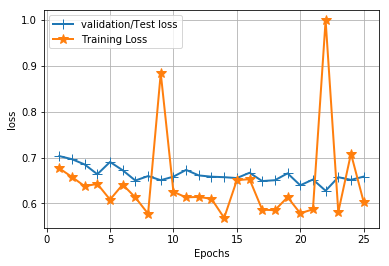

In [45]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,linewidth=2.0,marker="+",label="validation/Test loss",markersize=10.0)
plt.plot(epochs,val_loss_values,linewidth=2.0,marker="*",label="Training Loss",markersize=10.0)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.grid(True)
plt.legend()
plt.show()

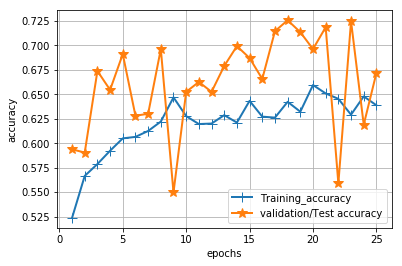

In [48]:
accuracy=history_dict["acc"]
val_acc=history_dict['val_acc']
epochs=range(1,len(val_acc)+1)
plt.plot(epochs,accuracy,linewidth=2.0,marker="+",label="Training_accuracy",markersize=10.0)
plt.plot(epochs,val_acc,linewidth=2.0,marker="*",label="validation/Test accuracy",markersize=10.0)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid(True)
plt.legend()
plt.show()

In [49]:
model.save("catvsdog.h5")

In [53]:
# Using numpy's savez function to store our loaded data as NPZ files
np.savez('cats_vs_dogs_training_data.npz', np.array(training_images))
np.savez('cats_vs_dogs_training_labels.npz', np.array(training_labels))
np.savez('cats_vs_dogs_test_data.npz', np.array(test_images))
np.savez('cats_vs_dogs_test_labels.npz', np.array(test_labels))
# Loader Function
import numpy as np

def load_data_training_and_test(datasetname):
    
    npzfile = np.load(datasetname + "_training_data.npz")
    train = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_training_labels.npz")
    train_labels = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_data.npz")
    test = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_labels.npz")
    test_labels = npzfile['arr_0']

    return (train, train_labels), (test, test_labels)
(x_train, y_train), (x_test, y_test) = load_data_training_and_test("cats_vs_dogs")

# Reshaping our label data from (2000,) to (2000,1) and test data from (1000,) to (1000,1)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

# Change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1998, 150, 150, 3)
(1998, 1)
(1000, 150, 150, 3)
(1000, 1)


In [54]:
import cv2
import numpy as np
from keras.models import load_model

classifier = load_model('catvsdog.h5')

def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    if pred == "[0]":
        pred = "cat"
    if pred == "[1]":
        pred = "dog"
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    #expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (252, 70) ,cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("Test Image", imageL)

    input_im = input_im.reshape(1,150,150,3) 
    
    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])

    draw_test("Prediction", res, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()